# Part I - Analysis for Ford GoBike System Data
## by Amaal Ahmed

## Introduction
This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area:

- Trip Duration (Seconds).
- Trip Start Time and Date.               
- Trip End Time and Date.               
- Start Station ID.           
- Start Station Name.          
- Start Station Latitude.  
- Start Station Longitude  
- End Station ID.            
- End Station Name.           
- End Station Latitude.     
- End Station Longitude.   
- Bike ID.                    
- User Type : ['Subscriber', 'Customer']              
- Member Birth Year.        
- Member Gender.               
- Bike Share for All Trip : ['No','Yes']


  

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt
%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
gobike_df = pd.read_csv('201902-fordgobike-tripdata.csv')
gobike_df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


In [3]:
# find number of rows and columns
gobike_df.shape

(183412, 16)

In [4]:
# find data types of columns
gobike_df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [5]:
# display top 5 rows
gobike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [6]:
# check information about our dataset
gobike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

##### Check null values

In [7]:
gobike_df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [8]:
# drop null values from our dataset
gobike_df.dropna(inplace=True)

In [9]:
# check null values again
gobike_df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [10]:
gobike_df.shape

(174952, 16)

##### Check duplicated values

In [11]:
# check duplicated values
gobike_df.duplicated().sum()

0

##### Change data types of columns

In [12]:
# convert user_type, member_gender, and bike_share_for_all_trip into categorical types
Category_dict = {'user_type': ['Subscriber', 'Customer'],
                   'member_gender': ['Male','Female', 'Other'],
                   'bike_share_for_all_trip': ['No','Yes']}

for var in Category_dict:
    Category_var = pd.api.types.CategoricalDtype(ordered = False,
                                                categories = Category_dict[var])
    gobike_df[var] = gobike_df[var].astype(Category_var)

In [13]:
# convert columns types
dtype_dict = {'start_time': 'datetime64[ns]',
         'end_time': 'datetime64[ns]',
        'start_station_id': 'object',
        'start_station_latitude': 'object',
        'start_station_longitude': 'object',
        'end_station_id': 'object',
        'end_station_latitude': 'object',
        'end_station_longitude': 'object',
        'bike_id': 'object',
        'member_birth_year':'int'}

gobike_df = gobike_df.astype(dtype_dict)

In [14]:
# check columns data types again
gobike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  object        
 6   start_station_longitude  174952 non-null  object        
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  object        
 10  end_station_longitude    174952 non-null  object        
 11  bike_id                  174952 non-null  object        
 12  user_type       

##### Check values of some columns

In [15]:
gobike_df['user_type'].value_counts()

Subscriber    158386
Customer       16566
Name: user_type, dtype: int64

In [16]:
gobike_df['member_gender'].value_counts()

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

In [17]:
gobike_df['bike_share_for_all_trip'].value_counts()

No     157606
Yes     17346
Name: bike_share_for_all_trip, dtype: int64

### What is the structure of your dataset?

> This dataset contains 183412 rows (174952 rows after cleaning) with 16 columns which describe information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

### What is/are the main feature(s) of interest in your dataset?

> The main feature of interest in the dataset is to know the persona of people who most interested in these rides made in a bike-sharing system in this area and its duration.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think the features in the dataset will help support my investigation are:
['user_type', 'member_birth_year', 'member_gender', 'start_station_name', 'end_station_name', 'duration_sec']

In [18]:
# drop unnecessary columns
gobike_df.drop(['start_station_id','end_station_id','bike_id','start_station_longitude','start_station_latitude','end_station_longitude','end_station_latitude'],axis=1,inplace=True)

In [19]:
gobike_df.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,1984,Male,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,1972,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,Subscriber,1989,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,Subscriber,1974,Male,Yes
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,Subscriber,1959,Male,No


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [20]:
# function to avoid repetitive code
def fig(fig_title):
    plt.figure(figsize=(10,6))
    plt.title(fig_title, fontsize=15)

### Bike User Types

In [21]:
user_type = gobike_df['user_type'].value_counts()
user_type

Subscriber    158386
Customer       16566
Name: user_type, dtype: int64

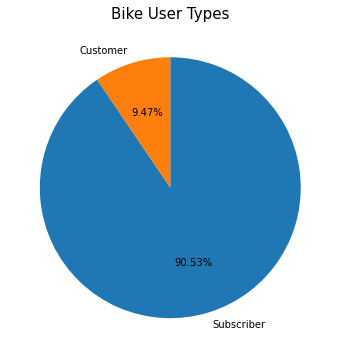

In [22]:
fig('Bike User Types')
plt.pie(user_type, labels = user_type.index, startangle = 90, counterclock = False, autopct='%1.2f%%')
plt.show()

> The most common user type is **Subscriber** with **90.53%**

### Bike User Gender

In [23]:
user_gender = gobike_df['member_gender'].value_counts()
user_gender

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

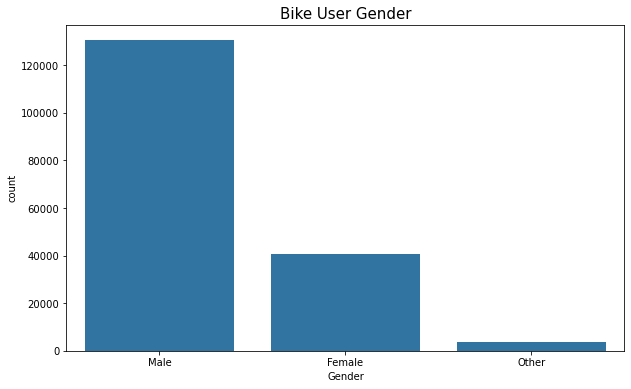

In [24]:
fig('Bike User Gender')
base_color = sb.color_palette()[0]
sb.countplot(data = gobike_df, x = 'member_gender', color = base_color)
plt.xlabel('Gender')
plt.show()

> **Male** is the most bike user gender.

### Bike User Birth Year

In [25]:
gobike_df['member_birth_year'].min()

1878

In [26]:
gobike_df['member_birth_year'].max()

2001

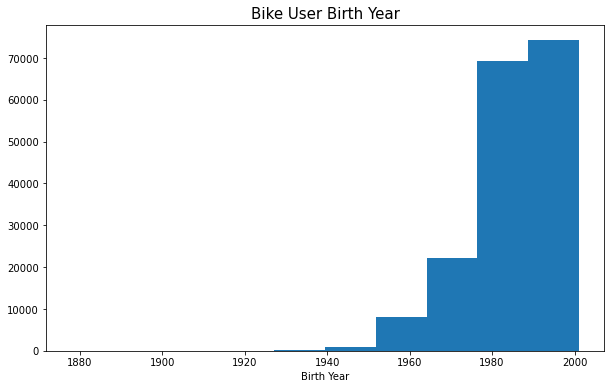

In [27]:
fig('Bike User Birth Year')
plt.hist(data = gobike_df, x = 'member_birth_year')
plt.xlabel('Birth Year')
plt.show()

> - The bike users birth year from **1878** to **2001**
> - The **most common age group** for bike users' birth year is from **1979** to **2001**

### Bike Share for All Trip

In [28]:
bike_share = gobike_df['bike_share_for_all_trip'].value_counts()
bike_share

No     157606
Yes     17346
Name: bike_share_for_all_trip, dtype: int64

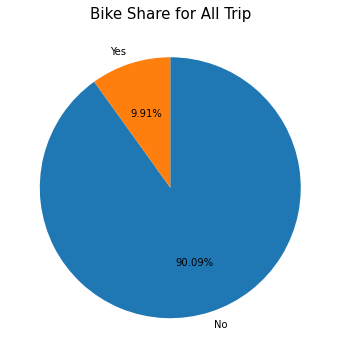

In [29]:
fig('Bike Share for All Trip')
plt.pie(bike_share, labels = bike_share.index, startangle = 90, counterclock = False, autopct='%1.2f%%')
plt.show()

> The most popular for bikes is **not sharing** for all trip

### Bike Stations

* #### Start_Stations

In [30]:
gobike_df['start_station_name'].nunique()

329

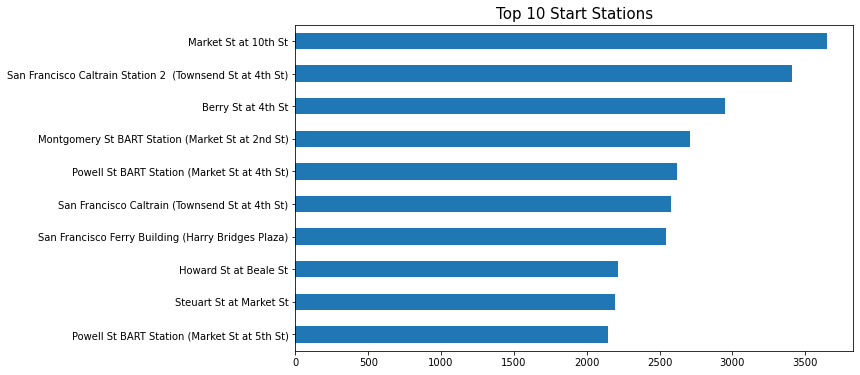

In [31]:
fig('Top 10 Start Stations')
gobike_df['start_station_name'].value_counts(ascending=True).tail(10).plot.barh()
plt.show()

* #### End_Stations

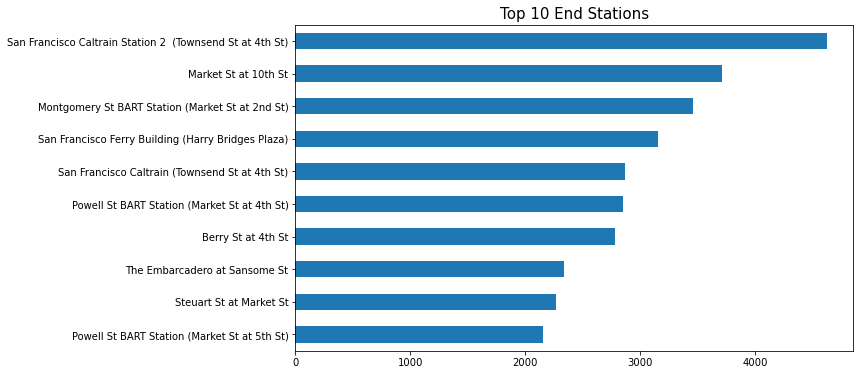

In [32]:
fig('Top 10 End Stations')
gobike_df['end_station_name'].value_counts(ascending=True).tail(10).plot.barh()
plt.show()

> - San Francisco Bay area has **329** Bike Stations
> - The most common **start station** is **Market St at 10th St**
> - The most common **end station** is **San Francisco Caltrain Station 2  (Townsend St at 4th St)**

### Trip Duration

In [33]:
gobike_df['duration_sec'].describe()

count    174952.000000
mean        704.002744
std        1642.204905
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

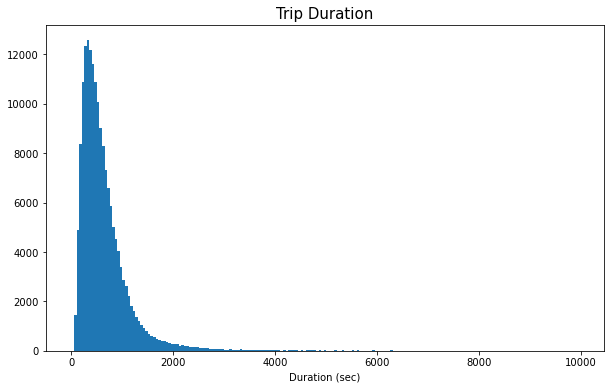

In [34]:
fig('Trip Duration')
bins = np.arange(0, 10000, 50)
plt.hist(data = gobike_df, x = 'duration_sec', bins=bins)
plt.xlabel('Duration (sec)')
plt.show()

> The **average** of the trip duration is **704.002744 seconds** (12 minutes)

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Yes, there are some problems like:
>- data types of columns
>- some null values in columns **[start_station_id, start_station_name, end_station_id, end_station_name, member_birth_year, member_gender]** <br>
>We change the data types to be suitable and drop null values as there is an enough data to achieve our interest to find the user persona.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Bike Users' Type with Gender

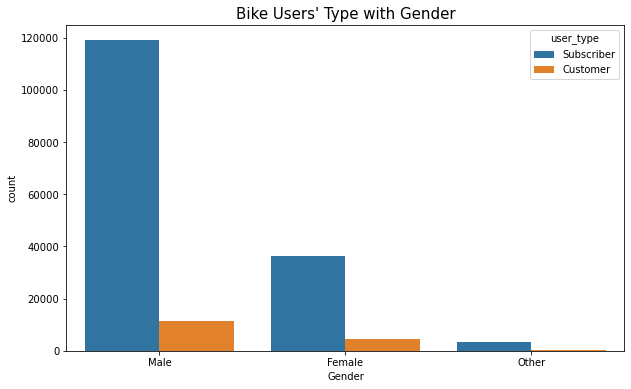

In [35]:
fig("Bike Users' Type with Gender")
sb.countplot(data = gobike_df, x = 'member_gender' , hue = 'user_type')
plt.xlabel('Gender')
plt.show()

> The most common bike users are **Subscribers** from **Males**

### Bike Sharing for All Trip with User Type

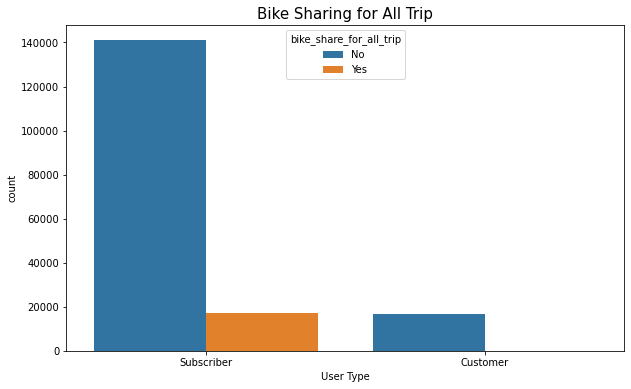

In [36]:
fig("Bike Sharing for All Trip")
sb.countplot(data = gobike_df, x = 'user_type', hue = 'bike_share_for_all_trip')
plt.xlabel('User Type')
plt.show()

> Bike sharing for all trip is only available to **Subscriber**

### Bike Users' Age with The Trip Duration

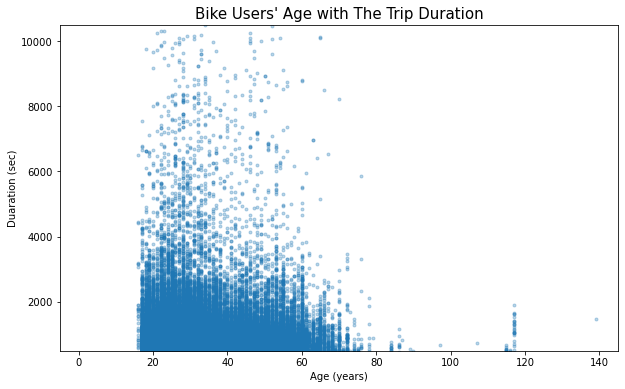

In [37]:
fig("Bike Users' Age with The Trip Duration")
plt.scatter((2017-gobike_df['member_birth_year']), gobike_df['duration_sec'], alpha = 0.3, marker = '.')
plt.axis([-5, 145, 500, 10500])
plt.xlabel('Age (years)')
plt.ylabel('Duaration (sec)')
plt.show()

> The most common trip **durations** are **below 6000 seconds** and **ages** between **20 and 60**.

### Bike Users' Type by Trip Duration

<Figure size 720x432 with 0 Axes>

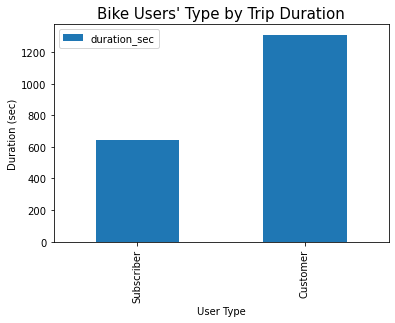

In [38]:
plt.figure(figsize=(10,6))
gobike_df[['duration_sec', 'user_type']].groupby('user_type').mean().plot.bar()
plt.title("Bike Users' Type by Trip Duration", fontsize=15);
plt.xlabel('User Type')
plt.ylabel('Duration (sec)')
plt.show()

> The customers have longer trip duration than the subscribers.

### Bike Users' Gender by Trip Duration

<Figure size 720x432 with 0 Axes>

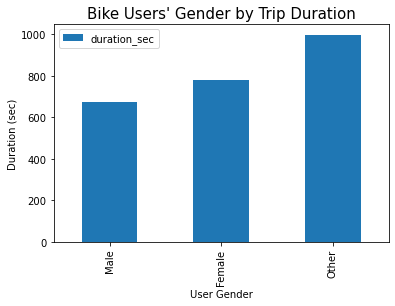

In [39]:
plt.figure(figsize=(10,6))
gobike_df[['duration_sec', 'member_gender']].groupby('member_gender').mean().plot.bar()
plt.title("Bike Users' Gender by Trip Duration", fontsize=15)
plt.xlabel('User Gender')
plt.ylabel('Duration (sec)')
plt.show()

> Females have longer trip duration than Males.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> - The most common bike users are Subscribers from Males.
> - Bike sharing for all trip is only available to Subscriber.
> - The most common trip durations are below 6000 seconds and ages between 20 and 60.
> - The customers have longer trip duration than the subscribers.
> - Females have longer trip duration than Males.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Yes, I think the trip duration changes depend on user type or user gender.


## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [40]:
# function to avoid repetitive code
def plot_scatter(cols, plot_title):
    sub_plot = sb.FacetGrid(data=gobike_df,col=cols,height=3,aspect=2)
    sub_plot.map(plt.scatter, data=gobike_df, x=(2017-gobike_df['member_birth_year']),y='duration_sec', alpha = 0.3)
    sub_plot.set_axis_labels('Age (Years)','Duration (Sec)')
    plt.suptitle(plot_title, fontsize=12);

### Bike Users' Type with Age and Duration

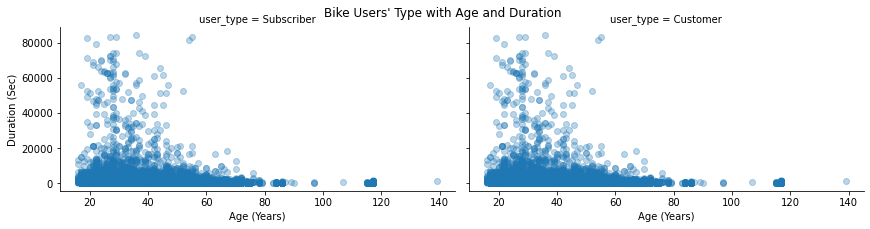

In [41]:
plot_scatter('user_type', "Bike Users' Type with Age and Duration")

> User type has **no effect** on the relationship between age and trip duration.

### Bike Users' Gender with Age and Duration

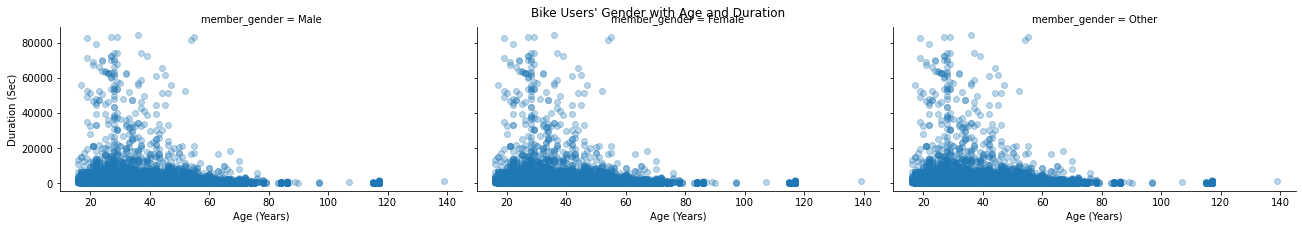

In [42]:
plot_scatter('member_gender', "Bike Users' Gender with Age and Duration")

> User gender has **no effect** on the relationship between age and trip duration.

### Bike Sharing for All Trip with Age and Duration

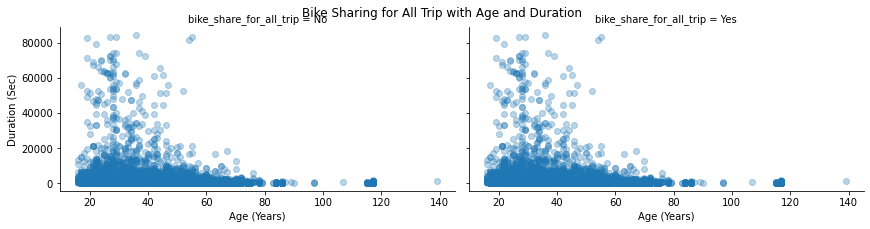

In [43]:
plot_scatter('bike_share_for_all_trip', "Bike Sharing for All Trip with Age and Duration")

> Bike sharing for all trip has **no effect** on the relationship between age and trip duration.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Most common bike users' persona is **Male** who is a **subscriber** with **age** between **20 and 60** years old.

### Were there any interesting or surprising interactions between features?

> The surprising was there is no relationship between **(bike sharing for all trip - user gender - user type)** and the relationship between **age and trip duration**.

## Conclusions

> - The most common user type is **Subscriber** with **90.53%**.
> - **Male** is the most bike user gender.
> - The bike users birth year from **1878** to **2001**.
> - The **most common age group** for bike users' birth year is from **1979** to **2001**.
> - The most popular for bikes is **not sharing** for all trip.
> - San Francisco Bay area has **329** Bike Stations.
> - The most common **start station** is **Market St at 10th St**.
> - The most common **end station** is **San Francisco Caltrain Station 2  (Townsend St at 4th St)**.
> - The **average** of the trip duration is **704.002744 seconds** (12 minutes).
> - The most common bike users are **Subscribers** from **Males**.
> - Bike sharing for all trip is only available to **Subscriber**.
> - The most common trip **durations** are **below 6000 seconds** and **ages** between **20 and 60**.
> - The customers have longer trip duration than the subscribers.
> - Females have longer trip duration than Males.
> - User type has **no effect** on the relationship between age and trip duration.
> - User gender has **no effect** on the relationship between age and trip duration.
> - Bike sharing for all trip has **no effect** on the relationship between age and trip duration.
> - There is no relationship between **(bike sharing for all trip - user gender - user type)** and the relationship between **age and trip duration**. <br>
> - **Finally**, Most common bike users' persona is **Male** who is a **subscriber** with **age** between **20 and 60** years old.